# Задание 2. Бинарная классификация.
В этом задании вам предстоит пройти путь от анализа и обработки данных до построения модели машинного обучения для решения задачи бинарной классификации.

**Датасет**: космический корабль «Титаник» с почти 13 000 пассажирами на борту отправился в свой первый рейс, чтобы доставить эмигрантов из нашей Солнечной системы к трем новым обитаемым экзопланетам, вращающимся вокруг ближайших звезд. К сожалению, по пути судно натолкнулось на пространственно-временную аномалию, вследствие чего почти половина пассажиров была перенесена в другое измерение! Чтобы помочь спасателям, необходимо на основе имеющихся сведений научиться предсказывать, кто из пассажиров был перенесен, а кто остался на корабле. [Ссылка](https://www.kaggle.com/competitions/spaceship-titanic) на страницу соревнования на Kaggle.

**Описание признаков:**

- `PassengerId`: уникальный ID для каждого пассажира. Каждый идентификатор имеет формат gggg_pp, где gggg указывает группу, с которой путешествует пассажир, а pp — его номер в группе. Люди в группе часто являются членами семьи, но не всегда.
- `HomePlanet`: планета, с которой пассажир отправился в путешествие
- `CryoSleep`: указывает, был ли пассажир быть переведен в режим анабиоза на время рейса.
- `Cabin`: номер кабины.
- `Destination`: планета назначения.
- `Age`: возраст.
- `VIP`: оплатил ли пассажир специальное VIP-обслуживание во время рейса.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: сумма, которую пассажир заплатил за различные удобства на борту.
- `Name`: Имя и фамилия.
- `Transported`: был ли пассажир перенесен в другое измерение. Это целевая переменная, которую необходимо предсказать.

- Импортируйте необходимые библиотеки. Загрузите датасет и отобразите первые несколько объектов, установите колонку `PassengerId` в качестве индекса. Разбейте для удобства исходный датафрейм на матрицу объектов-признаков $X$ и целевую переменную $y$

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

data = pd.read_csv('train.csv')
index = data['PassengerId']
data.index = index
data = data.drop(['PassengerId'], axis=1)


print(data.head())

x = data.drop('Transported', axis=1)
y = data['Transported']

            HomePlanet CryoSleep  Cabin  Destination   Age    VIP   
PassengerId                                                         
0001_01         Europa     False  B/0/P  TRAPPIST-1e  39.0  False  \
0002_01          Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
0003_01         Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
0003_02         Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
0004_01          Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

             RoomService  FoodCourt  ShoppingMall     Spa  VRDeck   
PassengerId                                                         
0001_01              0.0        0.0           0.0     0.0     0.0  \
0002_01            109.0        9.0          25.0   549.0    44.0   
0003_01             43.0     3576.0           0.0  6715.0    49.0   
0003_02              0.0     1283.0         371.0  3329.0   193.0   
0004_01            303.0       70.0         151.0   565.0     2.0   

                          Name  

- Для задания нам не понадобятся признаки `Cabin` и `Name`, отбросьте их. Отобразите, сколько признаков у нас осталось и сколько всего объектов в датасете.

In [32]:
x = x.drop(['Cabin', 'Name'], axis=1)

print(f"Количество признаков: {len(x.columns)}")
print(f"Количество объектов: {len(x)}")

Количество признаков: 10
Количество объектов: 8693


### Визуализация данных

Можете пользоваться как matplotlib, так и Seaborn

- Нарисуйте столбчатую диаграмму для признака `HomePlanet`. С какой планеты отправилось больше всего пассажиров?

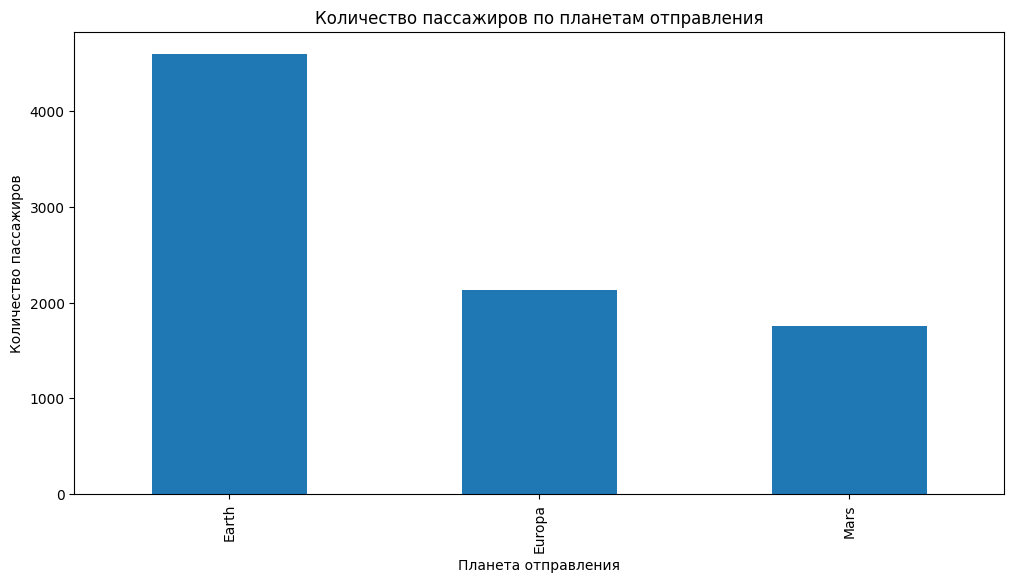

Больше всего пассажиров отправилось с планеты Earth


In [33]:
# Построение столбчатой диаграммы для признака HomePlanet
plt.figure(figsize=(12,6))
x['HomePlanet'].value_counts().plot(kind='bar')
plt.title('Количество пассажиров по планетам отправления')
plt.xlabel('Планета отправления')
plt.ylabel('Количество пассажиров')
plt.show()

# Определение планеты, с которой отправилось больше всего пассажиров
print(f"Больше всего пассажиров отправилось с планеты {x['HomePlanet'].value_counts().idxmax()}")

- Отобразите распределение таргета целевой переменной. Что можно о нем сказать? Оправдано ли использование метрики Accuracy в данной задаче?

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


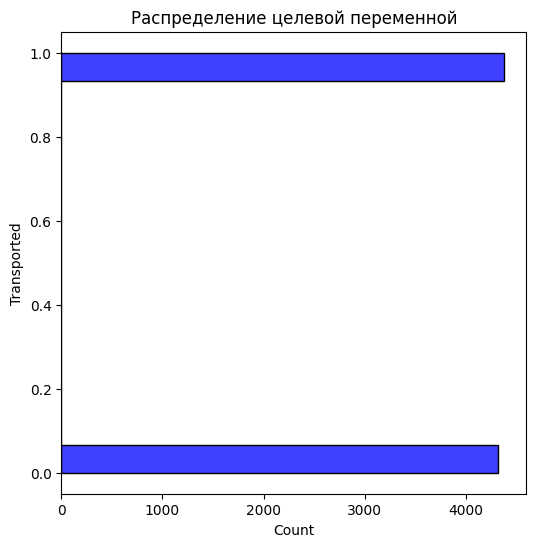

Распределение целевой переменной:
Значение 0: 4378
Значение 1: 4315


In [34]:
plt.figure(figsize=(6,6))
sns.histplot(y='Transported', data=data, color='b')
plt.title('Распределение целевой переменной')
plt.ylabel('Transported')
plt.show()


transported_counts = data['Transported'].value_counts()
print("Распределение целевой переменной:")
print(f"Значение 0: {transported_counts[0]}")
print(f"Значение 1: {transported_counts[1]}")


# Как видно из распределения количество перенесенных и неперенесенных пассажиров примерно равно, поэтому можно сделать вывод, что в данном случае оправдано использовать метрику Accuracy.

- Постройте распределения признаков `Age`, `RoomService` и `ShoppingMall` и найдите для каждого из них среднее, медиану, среднеквадратическое отклонение и 0.9-квантиль.

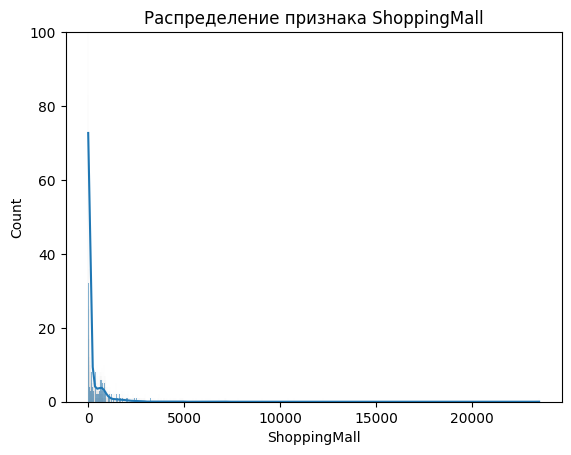

Среднее значение:  173.72916912197996
Медиана:  0.0
Среднеквадратическое отклонение:  604.6964584708243
0.9-квантиль:  619.6000000000004


In [35]:
sns.histplot(x['ShoppingMall'], kde=True)
plt.title("Распределение признака ShoppingMall")
plt.ylim([0, 100])
plt.show()
print("Среднее значение: ", x['ShoppingMall'].mean())
print("Медиана: ", x['ShoppingMall'].median())
print("Среднеквадратическое отклонение: ", x['ShoppingMall'].std())
print("0.9-квантиль: ", x['ShoppingMall'].quantile(q=0.9))

### Подготовка данных

- Для проверки работы модели будем использовать **валидацию на отложенной выборке**: часть данных будет использоваться для тренировки алгоритма, другая (меньшая) часть для валидации.

    Воспользуйтесь функцией `train_test_split` из библиотеки scikit-learn для разделения исходных $X$ и $y$ на тренировочные и валидационные данные. Размер валидационной выборки установите равным 20 процентам от общего размера выборки.

In [36]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

- Некоторые функции преобразования зависят от состава выборки. Как мы увидим далее, кодирование категориальных данных может зависеть от частоты появления той или иной категории в датасете, параметры StandartScaler также зависят от тренировочной выборки и т.д. Правильным подходом является "настройка" всех функций преобразований на тренировочном датасете, а затем применение их на валидационном датасете (подобно тому, как мы обучаем модель на трейне, а на валидационных данных только проверяем). Если применить все преобразования перед разделением датасета на train и validation, то мы столкнемся с проблемой **утечки данных (data leakage)**. В таком случае оценка нашей модели будет не совсем честной и искаженной (пусть даже если и немного). 

    В заданиях ниже необходимо будет преобразовывать как $X_{train}$, так и $X_{val}$
  
    Определите, какие из категориальных признаков в данных являются бинарными (принимают два значения). Преобразуйте их так, чтобы они принимали значения $0$ или $1$. Если в колонке имеются пропуски, замените их наиболее часто встречающимся значением (модой) в тренировочном датасете.

In [37]:
binary_cols = ['CryoSleep', 'VIP']

mode = x_train[binary_cols].mode().iloc[0]
x_train[binary_cols] = x_train[binary_cols].fillna(mode)
x_val[binary_cols] = x_val[binary_cols].fillna(mode)
x_train[binary_cols] = x_train[binary_cols].astype(int)
x_val[binary_cols] = x_val[binary_cols].astype(int)

print(x_train['CryoSleep'])
print(x_train['VIP'])
print('------------------------------')
print(x_val['CryoSleep'])
print(x_val['VIP'])

PassengerId
2513_01    0
2774_02    0
8862_04    1
8736_02    0
0539_02    1
          ..
6076_01    0
5537_01    0
5756_06    0
0925_01    0
7775_01    0
Name: CryoSleep, Length: 6954, dtype: int32
PassengerId
2513_01    0
2774_02    0
8862_04    0
8736_02    0
0539_02    0
          ..
6076_01    0
5537_01    0
5756_06    0
0925_01    0
7775_01    0
Name: VIP, Length: 6954, dtype: int32
------------------------------
PassengerId
0337_02    0
2891_01    0
8998_01    1
1771_01    0
9034_02    1
          ..
7656_01    1
3437_02    1
1384_01    0
6300_01    1
6442_01    0
Name: CryoSleep, Length: 1739, dtype: int32
PassengerId
0337_02    0
2891_01    0
8998_01    0
1771_01    0
9034_02    0
          ..
7656_01    0
3437_02    0
1384_01    0
6300_01    0
6442_01    0
Name: VIP, Length: 1739, dtype: int32


- На лекции мы рассматривали один из самых распространенных и простых методов кодирования категориальных данных - **one-hot кодирование**. Мы использовали его, когда признак мог принимать несколько (больше двух) значений. Одним из минусов этого алгоритма является то, что мы добавляем новые колонки в наш датасет, тем самым расширяя признаковое пространство при неизменном количестве исходных объектов.

    Рассмотрим другой метод кодирования категориальных данных - **Frequency Encoding (частотное кодирование**). В этом подходе каждая категория (рассматриваем некоторый признак) заменяется на число, равное количеству объектов с этим значением категории делённое на количество всех объектов. Иными словами мы пытаемся найти, насколько часто соответствующая категория встречается в наших данных. Пример работы алгоритма:

    <center><img src="freq_enc_example.png" alt="drawing" width="200"/></center>

    Данный метод достаточно прост и эффективен в использовании, он также не создает множество новых признаков в отличие от one-hot кодировани. Однако есть и минус: если две или несколько категорий встречаются в данных примерно одинаковое количество раз, то и закодированные величины будут очень близки друг к другу. Это может привести к тому, что для модели будет тяжелее выявить отличия между категориями.

    **Реализуйте функцию**, которая будет принимать на вход тренировочный и валидационный датафреймы и список колонок для преобразования. Обратите внимание, что **в колонках могут быть пропущенные значения** (NaN), обработайте их так, будто это еще одна дополнительная категория (например, если бы в примере выше помимо цветов была еще категория 'NaN'). Преобразуйте с помощью этой функции колонки, в которых больше двух категорий. Использовать готовые реализации алгоритма нельзя.

In [38]:
def freq_enc(x_train, x_val, col_enc):
    for col in col_enc:
        x_train[col] = x_train[col].fillna('NaN')
        x_val[col] = x_val[col].fillna('NaN')
        freq_dict = x_train[col].value_counts(normalize=True).to_dict()
        x_train[col] = x_train[col].apply(lambda x: freq_dict.get(x, 0))
        x_val[col] = x_val[col].apply(lambda x: freq_dict.get(x, 0))
    return x_train, x_val


- На данном этапе у вас не должно остаться пропусков в категориальных признаках. Заполните пропуски в оставшихся колонках медианным значением соответствующего признака. Удостоверьтесь, что у вас больше нет пропусков ни в каком признаке.

In [39]:
col_enc = ['HomePlanet', 'Destination']

x_train, x_val = freq_enc(x_train, x_val, col_enc)

def fill_med(x_train, x_val, num_cols):
    for col in num_cols:
        train_median = x_train[col].median()
        val_median = x_val[col].median()
        x_train[col] = x_train[col].fillna(train_median)
        x_val[col] = x_val[col].fillna(val_median)
    return x_train, x_val

num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

x_train, x_val = fill_med(x_train, x_val, num_cols)



print(x_train.isna().sum())
print('--------------')
print(x_val.isna().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
--------------
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


- Воспользуйтесь функцией `StandardScaler`, чтобы отмасштабировать данные по формуле $z = (x - \mu)/\sigma$, где $\mu$ - среднее значение тренировочных объектов, $\sigma$ - среднеквадратическое отклонение. Не забывайте, что настройка Scaler'а также производится на тренировочном датасете.

In [40]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

### Обучение и выбор модели

- Данные подготовлены, теперь пришло время переходить к построению модели. Оцените качество логистической регрессии с $L2$-регуляризацией (sklearn.linear_model.LogisticRegression) и метода опорных векторов с ядром `rbf` (sklearn.svm.SVC). Задайте некоторый диапазон для гиперпараметров и найдите, при каких из них метрика качества (будем использовать **Accuracy**) наибольшая. Какой алгоритм показал наилучшие результаты?
  
  Отобразите лучшее значение метрики и при каких параметрах оно достигается. Добейтесь значения Accuracy не меньше 0.77 хотя бы с одним из алгоритмов.

In [43]:
model = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)
C_regul = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100, 200, 500, 1000]

best_score = 0
best_params = {}
for regul in C_regul:
    model.C = regul
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    score = accuracy_score(y_val, y_pred)
    if score > best_score:
        best_score = score
        best_params = {'C': regul}
print(f"Лучшая точность: {best_score:.4f} при параметре: {best_params}")


Лучшая точность: 0.7642 при параметре: {'C': 5}


In [42]:
C_values = [0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 3]
gamma_values = [0.01, 0.1, 0.5, 1, 1.5, 2, 2.5]

best_score = 0
best_params = {}

for C in C_values:
    for gamma in gamma_values:
        clf = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        clf.fit(x_train, y_train)
        score = clf.score(x_val, y_val)
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'gamma': gamma}

print(f'Лучшая точность: {best_score:.4f} при параметрах: {best_params}')

Лучшая точность: 0.7821 при параметрах: {'C': 1.5, 'gamma': 1}
